In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model  # Import load_model function
import math
from individual_company_stock import getHistoryData
from datetime import date,timedelta

In [2]:
parent_dir="D:\\programs\\Applied data Science\\proj\\logres_op"
model_dir = os.path.join(parent_dir, "model")

In [3]:
data_files = os.listdir(model_dir)


In [4]:
cdate=date.today()
cdate

datetime.date(2023, 6, 29)

In [5]:
stock_name=[]
for data_file in data_files:
    stock_name.append(os.path.splitext(data_file)[0])

In [6]:
stock_name

['ADANIENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJAJFINSV',
 'BAJFINANCE',
 'BHARTIARTL',
 'BPCL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFC',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'MARUTI',
 'M_M',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SBIN',
 'SUNPHARMA',
 'TATACONSUM',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TECHM',
 'TITAN',
 'ULTRACEMCO',
 'UPL',
 'WIPRO']

> # Usage:

When loading the prediction.html with an associated [stock],

by utilizing the make_prediction function and create_plot function, generate the future 90 day [predictions],

pass the [predictions] data into the create_plot function which then returns a [plot] and 

load the webpage using the template with the parameters of [stock] [predictions] and [plot].

[stock] -> str

[predictions] -> Dataframe

[plot] -> image

# Functions:

make_prediction([stock]):

    loads stock model
    
    retrieves 90 day historical data from NSE
    
    prepares data for the model

    recieves predicted results from the model

    processes results back into close price estimates
    
    returns predicted close price

create_plot([prediction],[i]):
    
    Creates a plot of the predicted 90 day close price for [stock[i]]
    
    returns the plot

> ### Note1: No stock data needs to be imported as it is dynamically web scraped from NSE
> ### Note2: Website might close connection abruptly when attempting to retrieve data, calling the make_prediction function again would fix the issue
> ### Note3: The other functions are just called by the make_prediction and create_plot functions
> ### Note4: individual_company_stock.py is basically a module, keep it in the same folder as your app.py file but do not run

In [20]:
def strdate(cdate,daydiff=0):
    '''returns datetime in string with the option to get a different date'''
    cdate=cdate-timedelta(days=daydiff)
    return(cdate.strftime("%d-%m-%Y"))
def get_his(stock,startdate,enddate):
    '''retrives history for a stock for a given time period'''
    temp=getHistoryData(stock,from_date=startdate,to_date=enddate)
    temp=temp.replace({',':''},regex=True)
    # print(temp) 
    return temp
def load_stock_model(stock_name):
    '''loads a particular model'''
    model_path = os.path.join(model_dir, stock_name + ".h5")
    model = load_model(model_path)
    return model
def make_prediction(stock_name):
    '''loads model,scrapes data, predicts 90 day future for a stock based on current day and returns the predictions'''
    model=load_stock_model(stock_name)
    # print(stock_name)
    input_data=get_his(stock_name,strdate(cdate,daydiff=180),strdate(cdate))
    # print(input_data)
    input_data=pd.DataFrame(pd.to_numeric(pd.Series(input_data["close "].tail(91))),columns=["close "])
    input_data=input_data.reset_index(drop=True)
    input_data["logret"]=np.log(input_data["close "]) - np.log(input_data["close "].shift(1))
    input_data=input_data.drop(0,axis=0)
    input_data.reset_index(drop=True,inplace=True)
    predictions=model.predict(np.array(input_data["logret"][input_data["logret"].size-90:]).reshape(1,90,1),verbose=0)    
    t=[]
    for j in range(predictions.shape[0]):
        if(j==0):
            t.append(input_data["close "][0]*(math.e**predictions[j]))
        else:
            t.append((math.e**predictions[0][j])*t[j-1])
    predictions=pd.DataFrame(t).T
    return predictions#future 90 day predictions from today for stock [stock_name]
def create_plot(predictions,i):
    '''genrates a plot which can be used in a webpage based on predictions.
    Use in conjunction with outputs from make_prediction '''
    fig=plt.figure(figsize=(15,5))
    plt.scatter(np.arange(90),predictions,c="g",figure=fig)
    plt.plot(np.arange(90),predictions,figure=fig)
    plt.xticks(ticks=np.arange(0,90,5),labels=np.arange(1,91,5),figure=fig)
    plt.xlabel("created on "+str(date.today()),figure=fig)
    plt.ylabel("predicted value",figure=fig)
    plt.title("future 90Day predictions for "+str(stock_name[i]),figure=fig)
    return fig#figure(image) of 90 day predictions using [predictions]

In [9]:
# for i in range(50):
x=make_prediction(stock_name[10])

In [13]:
print("90 day close price predictions from"+str(date.today()+timedelta(days=1))+"are:")
print(x)

90 day close price predictions from2023-06-30are:
              0
0   4616.837402
1   4600.433105
2   4605.616699
3   4594.190430
4   4583.062988
..          ...
85  4579.381348
86  4591.181152
87  4584.458984
88  4604.610840
89  4608.802734

[90 rows x 1 columns]


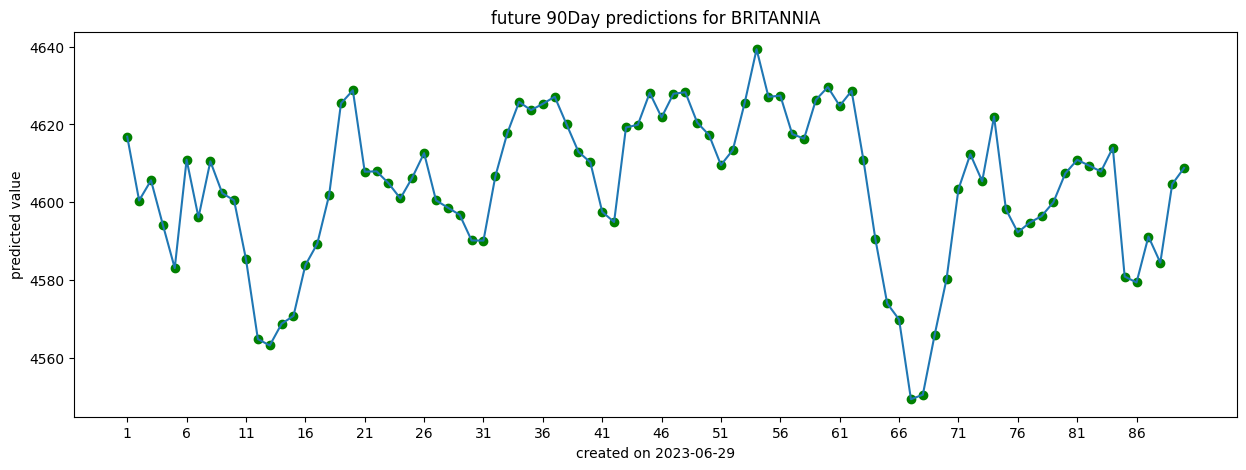

In [21]:
f=create_plot(x,10)